In [20]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import scipy
import numpy as np

In [21]:
os.listdir()

['buc_censor_times.tsv',
 'all_tert_ptc.csv',
 'nihms865784.pdf',
 'tert_cutaneous_melanoma.tsv',
 'Master_Notebook.ipynb',
 'tertpos_cutaneous_melanoma.tsv',
 'buc_pos.tsv',
 'tertpos_ptc.tsv',
 'README.md',
 'all_tert_buc.csv',
 'all_ptc.tsv',
 'alldata_tert_cleaned.csv',
 'all_tert_cm.csv',
 '.ipynb_checkpoints',
 'cm.sas',
 'censor_times.tsv',
 '.git',
 'buc.tsv',
 'Program 1.sas',
 'ptc_censor.tsv']

In [39]:
def process_pos_cen_all_data(pos_file, cen_file, all_file, out_name, mut_name, cancer_type):
    all_data = pd.read_csv(all_file, delimiter='\t')
    pos_data = pd.read_csv(pos_file, delimiter='\t')
    censor_data = pd.read_csv(cen_file, delimiter='\t')
    
    # get the positive and negative sample IDs for a given mutation
    neg_set = set(list(all_data['Sample ID'])) - set(list(pos_data['Sample ID']))
    pos_set = set(list(pos_data['Sample ID']))
    
    # update the all data based on which are positive and which are negative. 
    all_data[mut_name] = 0
    for item in pos_set:
        all_data.loc[all_data["Sample ID"]==item, mut_name] = 1

    all_data[(all_data["Sample ID"]==item)][mut_name]


    # handle the censor file 
    censor_data['censor'] = 0
    for i,row in censor_data.iterrows():
        censor=0
        if row['OS_MONTHS'] != 'nan' and 'LIVING' in row['OS_STATUS']:
            censor=1

        censor_data.at[i,'censor'] = censor
        
    merged = pd.merge(all_data, censor_data, on='Patient ID', how='left')
    
    # invoke the right censoring that was used in the study
    sns.boxplot(y="OS_MONTHS", x="TERT mutation", data=merged).set_title("Months Survival vs TERT Mutation Status for %s" %(cancer_type))
    plt.ylabel("Months after Procedure")
    plt.show()
    print(len(merged[merged["OS_MONTHS"]>=24]))
    # with right censored 
    merged.loc[merged["OS_MONTHS"]>24, 'censor'] = 1
    merged.loc[merged["OS_MONTHS"]>24, 'OS_MONTHS'] = 24
    merged.loc[merged['Overall Survival (Months)']>24, 'Overall Survival (Months)'] = 24

    
    # without right censored
    #merged = merged[merged['OS_MONTHS'] <= 24]
    
    #print(len(merged[merged["OS_MONTHS"]>=24]))
    sns.boxplot(y="OS_MONTHS", x="TERT mutation", data=merged).set_title("Filtered Months Survival vs TERT Mutation Status for %s" %(cancer_type))
    plt.ylabel("Months after Procedure")
    plt.show()
    print(merged['censor'].value_counts())
    print(merged['TERT mutation'].value_counts())

    merged.to_csv(out_name)
    return merged
    

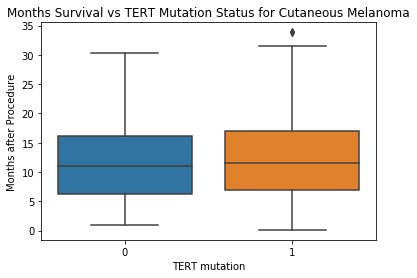

12


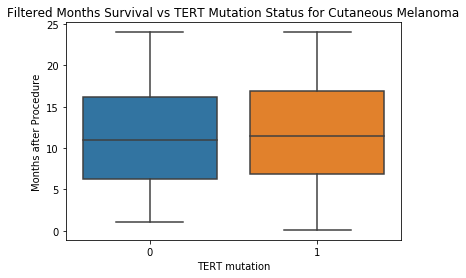

1    139
0     56
Name: censor, dtype: int64
1    143
0     52
Name: TERT mutation, dtype: int64


In [40]:
cm = process_pos_cen_all_data(pos_file='tertpos_cutaneous_melanoma.tsv', 
                         cen_file='censor_times.tsv',
                         all_file='tert_cutaneous_melanoma.tsv', 
                         out_name='all_tert_cm.csv',
                         mut_name='TERT mutation',
                         cancer_type = "Cutaneous Melanoma")

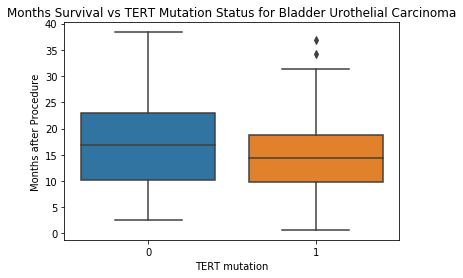

23


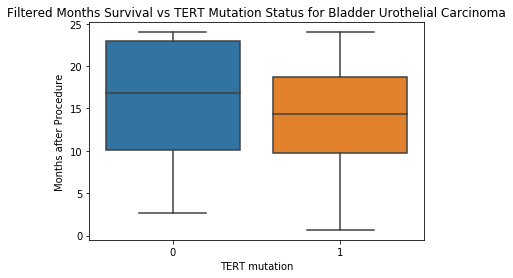

1    231
0     81
Name: censor, dtype: int64
1    230
0     82
Name: TERT mutation, dtype: int64


Index(['Study ID_x', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class', 'Sample Collection Source',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Specimen Preservation Type', 'Specimen Type',
       'Tumor Purity', 'Patient's Vital Status', 'TERT mutation', 'Study ID_y',
       'OS_STATUS', 'OS_MONTHS', 'censor'],
      dtype='object')

In [41]:
buc = process_pos_cen_all_data(pos_file='buc_pos.tsv', 
                         cen_file='buc_censor_times.tsv',
                         all_file='buc.tsv', 
                         out_name='all_tert_buc.csv',
                         mut_name='TERT mutation',
                         cancer_type = "Bladder Urothelial Carcinoma")
buc.columns

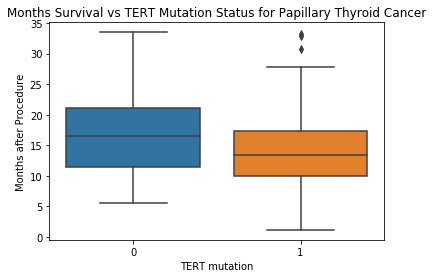

6


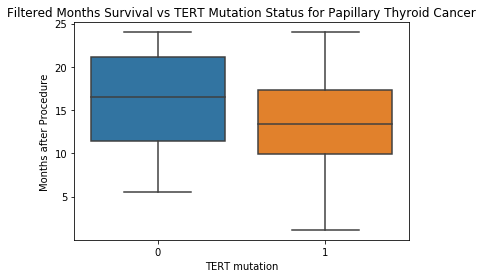

1    80
0    13
Name: censor, dtype: int64
1    59
0    34
Name: TERT mutation, dtype: int64


In [42]:
ptc = process_pos_cen_all_data(pos_file='tertpos_ptc.tsv', 
                         cen_file='ptc_censor.tsv',
                         all_file='all_ptc.tsv', 
                         out_name='all_tert_ptc.csv',
                         mut_name='TERT mutation',
                         cancer_type = "Papillary Thyroid Cancer")

In [43]:
np.round(cm.describe(), 2).T[['mean', 'std', 'min', 'max']]


,mean,std,min,max
DNA Input,237.87,37.02,58.85,250.00
Fraction Genome Altered,0.23,0.19,0.00,0.92
Mutation Count,22.33,29.04,0.00,246.00
Overall Survival (Months),11.94,6.73,0.10,24.00
Number of Samples Per Patient,1.06,0.23,1.00,2.00
Sample coverage,739.30,257.97,127.00,1647.00
Tumor Purity,55.62,22.50,10.00,90.00
TERT mutation,0.73,0.44,0.00,1.00
OS_MONTHS,11.94,6.73,0.10,24.00
censor,0.71,0.45,0.00,1.00


In [44]:

cat_list = ['Smoking History','Sex','Sample Type', 'Sample Class', 'Cancer Type', 'Cancer Type Detailed', 'Matched Status', 'Oncotree Code', 'Specimen Type', 'Specimen Preservation Type', 'Sample Type','censor', 'TERT mutation']
quant_list = ['DNA Input', 'Fraction Genome Altered', 'Mutation Count', 'Overall Survival (Months)', 'Sample coverage', 'Tumor Purity',]
quant_list2 = ['DNA Input', 'Fraction Genome Altered', 'Mutation Count', 'Overall Survival (Months)', 'Sample coverage', 'Tumor Purity', ]

def tables_and_stuff(df):

    del df['OS_MONTHS']
    del df['Number of Samples Per Patient']

    
    quant_list = []
    tert_df_true = df[df['TERT mutation'] == 1]
    tert_df_false = df[df['TERT mutation'] == 0]
    
    for col in cat_list:
        tert_df_true[col] = tert_df_true[col].astype('category')
        tert_df_false[col] = tert_df_false[col].astype('category')
        df[col]= df[col].astype('category')
    tert_true_stats =np.round(df[df['TERT mutation'] == 1].describe(), 2).T[['mean', 'std', 'min', 'max']]
    tert_false_stats = np.round(df[df['TERT mutation'] == 0].describe(), 2).T[['mean', 'std', 'min', 'max']]

        #tert_df_false[col] = tert_df_false[col].astype('category')
        
    tert_true_cat_stats = tert_df_true.describe(include='category')
    tert_false_cat_stats = tert_df_false.describe(include='category')
    
    #for col in cat_list:
        

    return([df, tert_df_true, tert_df_false, tert_true_stats, tert_false_stats, tert_true_cat_stats, tert_false_cat_stats])

In [28]:
buc_out = tables_and_stuff(buc)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


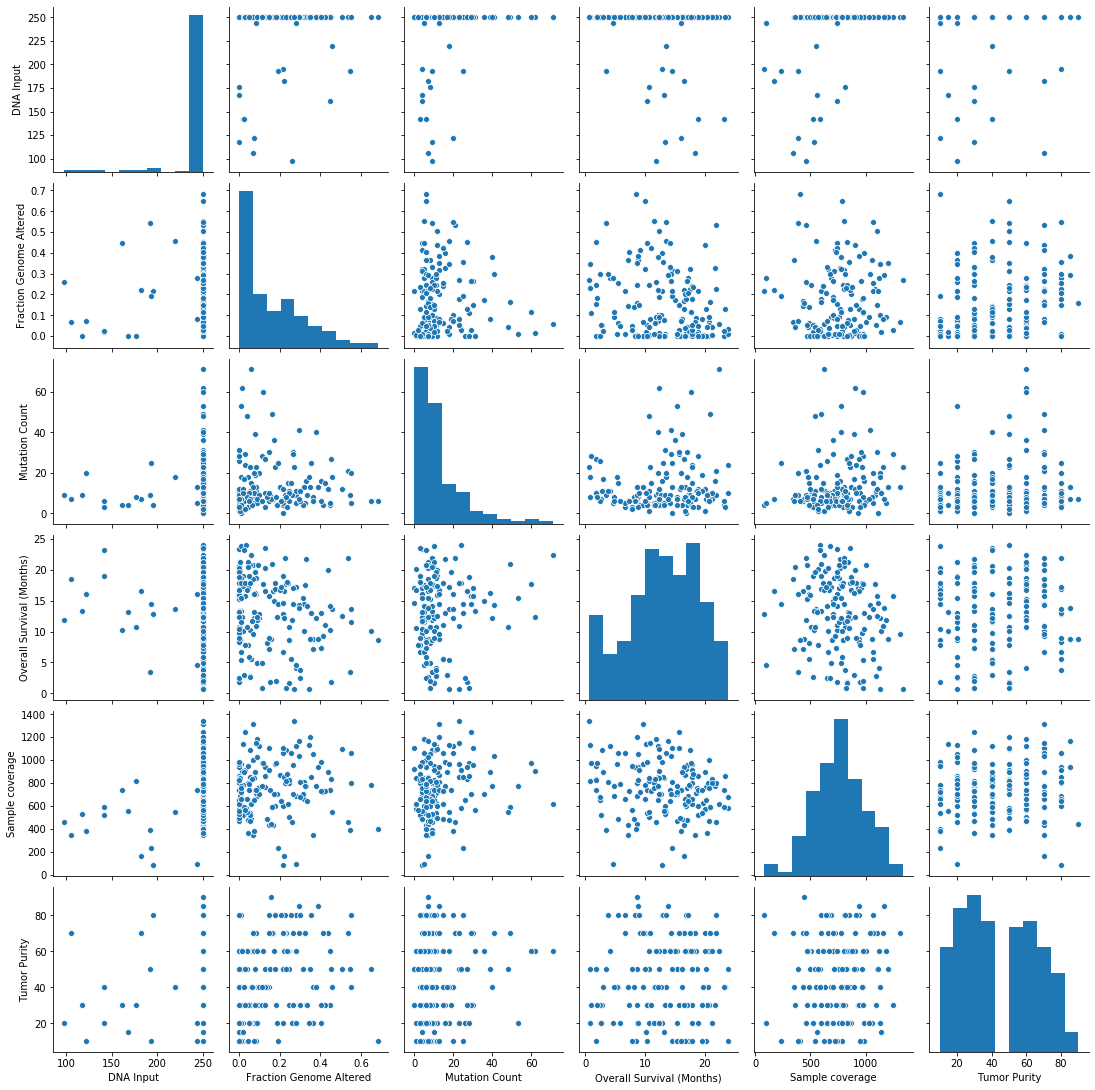

In [29]:
sns.pairplot(buc_out[0][quant_list])
#buc_out[0].head()

In [30]:
print(buc_out[3].to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &    mean &     std &    min &      max \\
\midrule
DNA Input                 &  243.65 &   24.27 &  97.20 &   250.00 \\
Fraction Genome Altered   &    0.18 &    0.16 &   0.00 &     0.68 \\
Mutation Count            &   14.12 &   11.70 &   2.00 &    62.00 \\
Overall Survival (Months) &   12.68 &    5.69 &   0.66 &    21.93 \\
Sample coverage           &  769.79 &  242.71 &  84.00 &  1337.00 \\
Tumor Purity              &   44.66 &   21.54 &  10.00 &    90.00 \\
\bottomrule
\end{tabular}



In [31]:
print(buc_out[4].to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &    mean &     std &     min &      max \\
\midrule
DNA Input                 &  235.24 &   39.12 &  105.45 &   250.00 \\
Fraction Genome Altered   &    0.10 &    0.15 &    0.00 &     0.65 \\
Mutation Count            &    9.69 &   13.76 &    0.00 &    71.00 \\
Overall Survival (Months) &   14.31 &    6.62 &    2.63 &    23.93 \\
Sample coverage           &  719.61 &  200.08 &  233.00 &  1108.00 \\
Tumor Purity              &   39.86 &   23.47 &   10.00 &    85.00 \\
\bottomrule
\end{tabular}



In [32]:
p_list = []
for i in quant_list:
    p_list.append(scipy.stats.f_oneway([x for x in buc_out[1][i].to_list() if str(x) !='nan'],[x for x in buc_out[2][i].to_list() if str(x) !='nan']).pvalue)
print(pd.DataFrame({"p_value":p_list}, index=quant_list).to_latex())

\begin{tabular}{lr}
\toprule
{} &   p\_value \\
\midrule
DNA Input                 &  0.119777 \\
Fraction Genome Altered   &  0.015376 \\
Mutation Count            &  0.057644 \\
Overall Survival (Months) &  0.147221 \\
Sample coverage           &  0.259913 \\
Tumor Purity              &  0.259022 \\
\bottomrule
\end{tabular}



In [33]:
print(buc_out[2]['Tumor Purity'].to_list())
print(buc_out[1]['Tumor Purity'].to_list())

[40.0, 30.0, nan, 30.0, 60.0, 60.0, 70.0, 10.0, 70.0, 10.0, 10.0, 50.0, 70.0, 40.0, 30.0, 40.0, 20.0, 60.0, 40.0, 30.0, 30.0, 10.0, 20.0, 10.0, 80.0, 70.0, 80.0, 85.0, 20.0, 40.0, 10.0, 50.0, 10.0, 50.0, 40.0, 20.0]
[50.0, 60.0, 80.0, 80.0, 30.0, 70.0, 70.0, 70.0, 80.0, 60.0, 50.0, 40.0, 30.0, 60.0, 60.0, 50.0, 10.0, nan, 20.0, 30.0, 20.0, 40.0, 30.0, nan, 40.0, 60.0, 20.0, 30.0, 90.0, 70.0, 40.0, 40.0, 40.0, 10.0, 70.0, 40.0, 70.0, 20.0, 20.0, 60.0, 40.0, 60.0, 50.0, 20.0, 80.0, 30.0, 30.0, 50.0, 40.0, 40.0, 50.0, 30.0, 50.0, 60.0, 30.0, 60.0, 50.0, 50.0, 30.0, 10.0, nan, 30.0, 20.0, 30.0, 20.0, 60.0, 10.0, 10.0, 30.0, 70.0, 50.0, 20.0, 20.0, 20.0, 80.0, 60.0, 60.0, 30.0, 70.0, 30.0, 50.0, 60.0, 60.0, 70.0, 30.0, 70.0, 20.0, 10.0, 20.0, 20.0, 30.0, 80.0, 60.0, 80.0, 40.0, 30.0, 15.0, 80.0, 20.0, 10.0, 60.0, 50.0, 15.0, 60.0, 70.0, 20.0, 20.0, 50.0, 50.0, 80.0, 40.0, 70.0, 40.0, 85.0, 50.0, 20.0, 80.0, nan, 40.0, 30.0, 50.0]


In [34]:
print(buc_out[5].T.loc[cat_list].to_latex())

\begin{tabular}{lllll}
\toprule
{} & count & unique &                           top & freq \\
\midrule
Smoking History            &   121 &      3 &              Prev/Curr Smoker &   81 \\
Sex                        &   121 &      2 &                          Male &   98 \\
Sample Type                &   121 &      2 &                       Primary &   81 \\
Sample Class               &   121 &      1 &                         Tumor &  121 \\
Cancer Type                &   121 &      1 &                Bladder Cancer &  121 \\
Cancer Type Detailed       &   121 &      1 &  Bladder Urothelial Carcinoma &  121 \\
Matched Status             &   121 &      1 &                       Matched &  121 \\
Oncotree Code              &   121 &      1 &                          BLCA &  121 \\
Specimen Type              &   121 &      3 &                        Biopsy &   74 \\
Specimen Preservation Type &   121 &      2 &                          FFPE &   91 \\
Sample Type                &   121 & 

In [35]:
print(buc_out[6].T.loc[cat_list].to_latex())

\begin{tabular}{lllll}
\toprule
{} & count & unique &                           top & freq \\
\midrule
Smoking History            &    36 &      3 &              Prev/Curr Smoker &   21 \\
Sex                        &    36 &      2 &                          Male &   29 \\
Sample Type                &    36 &      2 &                       Primary &   23 \\
Sample Class               &    36 &      1 &                         Tumor &   36 \\
Cancer Type                &    36 &      1 &                Bladder Cancer &   36 \\
Cancer Type Detailed       &    36 &      1 &  Bladder Urothelial Carcinoma &   36 \\
Matched Status             &    36 &      1 &                       Matched &   36 \\
Oncotree Code              &    36 &      1 &                          BLCA &   36 \\
Specimen Type              &    36 &      2 &                        Biopsy &   22 \\
Specimen Preservation Type &    36 &      2 &                          FFPE &   28 \\
Sample Type                &    36 & 

In [36]:
test_stat_list = []
#TODO could fix this to groupby full data first so columns are the same length
for i in cat_list:
    cat_list_test = buc_out[1].groupby(i).count().iloc[:,0].to_list()
    cat_list_prop_test = [i for i in cat_list_test]
    cat_list_test_pos = buc_out[2].groupby(i).count().iloc[:,0].to_list()
    cat_list_prop_test_pos = [i for i in cat_list_test_pos]
    print(cat_list_prop_test)
    print(cat_list_prop_test_pos)
    print(i)
    try:
        test_stat_list.append(scipy.stats.chi2_contingency(np.array([cat_list_prop_test, cat_list_prop_test_pos]))[1])
    except:
        test_stat_list.append(0)
    
print(test_stat_list)


[29, 81, 11]
[13, 21, 2]
Smoking History
[23, 98]
[7, 29]
Sex
[40, 81]
[13, 23]
Sample Type
[121]
[36]
Sample Class
[121]
[36]
Cancer Type
[121]
[36]
Cancer Type Detailed
[121]
[36]
Matched Status
[121]
[36]
Oncotree Code
[74, 2, 45]
[22, 14]
Specimen Type
[30, 91]
[8, 28]
Specimen Preservation Type
[40, 81]
[13, 23]
Sample Type
[47, 74]
[8, 28]
censor
[121]
[36]
TERT mutation
[0.32224424673796837, 0.8547949507811422, 0.8891632321695497, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.9246508392157281, 0.8891632321695497, 0.10181009769625268, 1.0]


In [37]:
print(pd.DataFrame({"p_value":test_stat_list}, index=cat_list).to_latex())


\begin{tabular}{lr}
\toprule
{} &   p\_value \\
\midrule
Smoking History            &  0.322244 \\
Sex                        &  0.854795 \\
Sample Type                &  0.889163 \\
Sample Class               &  1.000000 \\
Cancer Type                &  1.000000 \\
Cancer Type Detailed       &  1.000000 \\
Matched Status             &  1.000000 \\
Oncotree Code              &  1.000000 \\
Specimen Type              &  0.000000 \\
Specimen Preservation Type &  0.924651 \\
Sample Type                &  0.889163 \\
censor                     &  0.101810 \\
TERT mutation              &  1.000000 \\
\bottomrule
\end{tabular}



In [38]:
np.round(ptc[].describe(), 2).T[['mean', 'std', 'min', 'max']]


SyntaxError: invalid syntax (<ipython-input-38-8a525f95ee49>, line 1)

In [ ]:
Questions for class:
    
    What if we were to consider all data togehter (all tumor types)
    What is the relationship between Fraction Genome altered and TERT mutation